In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
len(x_train)

60000

In [9]:
len(y_test)

10000

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

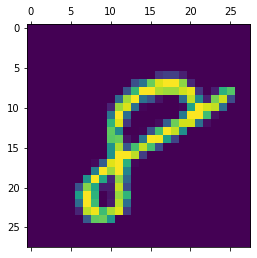

In [13]:
plt.matshow(x_train[59999])

In [14]:
x_train=x_train/255
x_test=x_test/255


In [15]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_train_flattened.shape


(60000, 784)

In [16]:
x_test_flattened.shape

(10000, 784)

In [17]:
#model training
model = keras.Sequential([keras.layers.Dense(10, input_shape=(784,),activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2733 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9257


In [18]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2694 - accuracy: 0.9262


[0.26936468482017517, 0.9261999726295471]

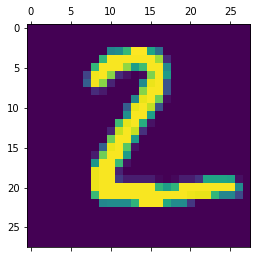

In [19]:
plt.matshow(x_test[1])

In [20]:
y_predict=model.predict(x_test_flattened)
y_predict[1]

array([4.7430608e-01, 5.7843029e-03, 9.9934769e-01, 4.1184580e-01,
       9.0815433e-10, 8.9436078e-01, 8.6495662e-01, 7.1027006e-13,
       2.2636414e-01, 1.9377784e-09], dtype=float32)

In [21]:
np.argmax(y_predict[1])

2

In [22]:
y_predict_og_val=[np.argmax(i) for i in y_predict]
y_predict_og_val[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [23]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [26]:
#confusion matrix
cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict_og_val)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    3,    0,    5,    7,    2,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  908,   21,   10,    6,   12,   10,   47,    4],
       [   1,    0,   12,  923,    1,   28,    2,    9,   25,    9],
       [   1,    1,    2,    1,  926,    0,   12,    3,    8,   28],
       [   7,    3,    1,   26,   12,  790,   14,    3,   31,    5],
       [   8,    3,    4,    2,    8,   17,  911,    2,    3,    0],
       [   1,    5,   20,    8,    9,    1,    0,  944,    3,   37],
       [   4,    6,    6,   16,   10,   33,    8,    9,  875,    7],
       [  10,    7,    1,    9,   37,    8,    0,   15,    6,  916]])>

Text(69.0, 0.5, 'Truth')

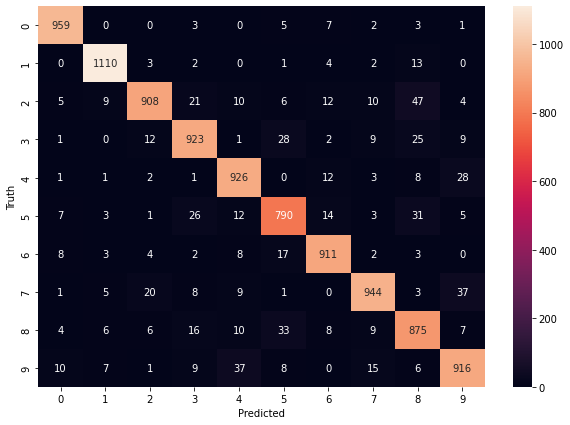

In [27]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
#adding hidden layer in neural network to improve accuracy and reduce loss
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'), #hidden_layer
    keras.layers.Dense(10,activation='sigmoid')
])
        

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5) 

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2649 - accuracy: 0.9253
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1183 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0837 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0642 - accuracy: 0.9805
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0510 - accuracy: 0.9844


In [29]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0803 - accuracy: 0.9745


[0.0803237110376358, 0.9745000004768372]

Text(69.0, 0.5, 'Truth')

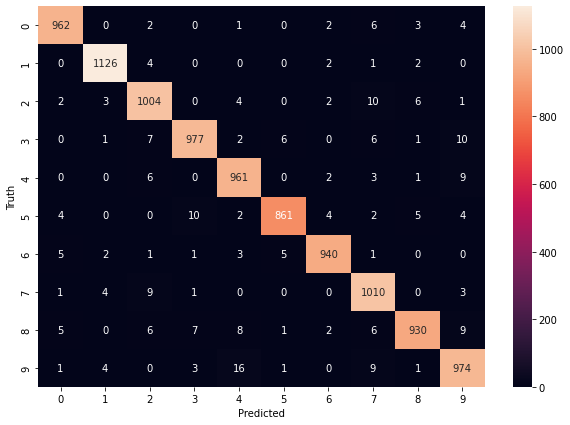

In [30]:
y_predict=model.predict(x_test_flattened)

y_predict_og_val=[np.argmax(i) for i in y_predict]

cm=tf.math.confusion_matrix(labels=y_test, predictions=y_predict_og_val)


plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
#model training without flatten 2d array to 1d array by using keras.layers.flatten
#so we do not have to specify the input_shape
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'), #hidden_layer
    keras.layers.Dense(10,activation='sigmoid')
])
        

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2751 - accuracy: 0.9220: 0s -
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1226 - accuracy: 0.9644
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0854 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0513 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0410 - accuracy: 0.9875
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0270 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9933
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: